In [2]:
import pandas as pd
import numpy as np
from ta.trend import SMAIndicator, EMAIndicator
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands

In [4]:
df = pd.read_csv('../time_series_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume
0,2022-09-26,A,123.180000,124.250000,121.629997,122.309998,120.425545,1733100.0
1,2022-09-27,A,123.870003,124.070000,120.599998,121.610001,119.736313,1040500.0
2,2022-09-28,A,122.769997,124.430000,121.599998,123.720001,121.813828,1361200.0
3,2022-09-29,A,122.809998,124.239998,122.279999,122.739998,120.848915,1312800.0
4,2022-09-30,A,123.019997,125.129997,121.379997,121.550003,119.677254,1624200.0


In [5]:
def engineer_features(group):
    group = group.sort_values('Date')
    group['Returns'] = group['Close'].pct_change()
    group['SMA_50'] = group['Close'].rolling(window=50).mean()
    group['EMA_20'] = group['Close'].ewm(span=20, adjust=False).mean()
    group['RSI'] = RSIIndicator(group['Close']).rsi()
    bb = BollingerBands(group['Close'])
    group['BB_upper'] = bb.bollinger_hband()
    group['BB_lower'] = bb.bollinger_lband()
    group['Volume_MA_5'] = group['Volume'].rolling(window=5).mean()
    return group

In [7]:
# def engineer_features(df):
#     # Calculate returns
#     df['Returns'] = df['Close'].pct_change()
    
#     # Moving averages
#     df['SMA_50'] = SMAIndicator(df['Close'], window=50).sma_indicator()
#     df['EMA_20'] = EMAIndicator(df['Close'], window=20).ema_indicator()
    
#     # RSI
#     df['RSI'] = RSIIndicator(df['Close']).rsi()
    
#     # Bollinger Bands
#     bb = BollingerBands(df['Close'])
#     df['BB_upper'] = bb.bollinger_hband()
#     df['BB_lower'] = bb.bollinger_lband()
    
#     # Volume features
#     df['Volume_MA_5'] = df['Volume'].rolling(window=5).mean()
    
#     return df

df = df.groupby('Ticker').apply(engineer_features).reset_index(drop=True)


/var/folders/7q/9t1f98rn10x46qx3z1s8kvp00000gp/T/ipykernel_38570/2859006869.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Ticker').apply(engineer_features).reset_index(drop=True)


In [8]:
# Display the last 5 rows for 3 different stocks
for ticker in df['Ticker'].unique()[:3]:
    print(f"\nLast 5 rows for {ticker}:")
    print(df[df['Ticker'] == ticker].tail())


Last 5 rows for A:
          Date Ticker        Open        High         Low       Close  \
500 2024-09-23      A  141.149994  141.149994  138.600006  139.789993   
501 2024-09-24      A  140.100006  143.270004  139.309998  141.869995   
502 2024-09-25      A  141.970001  142.839996  139.210007  139.440002   
503 2024-09-26      A  141.259995  146.960007  140.539993  146.740005   
504 2024-09-27      A  147.179993  150.080002  147.179993  148.059998   

      Adj Close     Volume   Returns      SMA_50      EMA_20        RSI  \
500  139.567810  2179500.0 -0.002142  137.814399  139.038942  53.300126   
501  141.644501  1930100.0  0.014879  138.031599  139.308566  58.931222   
502  139.218369  1437300.0 -0.017128  138.099199  139.321083  51.168627   
503  146.506775  2149700.0  0.052352  138.363999  140.027647  65.760043   
504  147.824661  2213000.0  0.008995  138.685799  140.792633  67.642834   

       BB_upper    BB_lower  Volume_MA_5  
500  142.908932  135.771067    1723940.0  
501 

In [9]:
df

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume,Returns,SMA_50,EMA_20,RSI,BB_upper,BB_lower,Volume_MA_5
0,2022-09-26,A,123.180000,124.250000,121.629997,122.309998,120.425545,1733100.0,NaN,NaN,122.309998,NaN,NaN,NaN,NaN
1,2022-09-27,A,123.870003,124.070000,120.599998,121.610001,119.736313,1040500.0,-0.005723,NaN,122.243331,NaN,NaN,NaN,NaN
2,2022-09-28,A,122.769997,124.430000,121.599998,123.720001,121.813828,1361200.0,0.017351,NaN,122.383966,NaN,NaN,NaN,NaN
3,2022-09-29,A,122.809998,124.239998,122.279999,122.739998,120.848915,1312800.0,-0.007921,NaN,122.417874,NaN,NaN,NaN,NaN
4,2022-09-30,A,123.019997,125.129997,121.379997,121.550003,119.677254,1624200.0,-0.009695,NaN,122.335220,NaN,NaN,NaN,1414360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250829,2024-09-23,ZTS,192.809998,193.660004,191.080002,193.589996,193.589996,1315700.0,0.004931,184.883200,190.102921,62.459468,198.488676,179.557326,2251240.0
250830,2024-09-24,ZTS,194.960007,195.710007,192.889999,193.690002,193.690002,2045100.0,0.000517,185.197401,190.444547,62.651534,198.648622,180.610381,2267680.0
250831,2024-09-25,ZTS,193.839996,195.779999,190.800003,191.529999,191.529999,1906300.0,-0.011152,185.369800,190.547924,55.988648,198.457974,181.744028,2250180.0
250832,2024-09-26,ZTS,192.119995,195.160004,191.869995,194.869995,194.869995,1556100.0,0.017439,185.626200,190.959550,62.610203,198.611975,182.786026,2068780.0


In [10]:
df.isnull().sum()

Date               0
Ticker             0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Returns          501
SMA_50         24504
EMA_20             0
RSI             6504
BB_upper        9504
BB_lower        9504
Volume_MA_5     2004
dtype: int64

In [18]:
# Fill Returns with 0
df['Returns'] = df['Returns'].fillna(0)

# For SMA, RSI, BB, and Volume_MA, we'll leave as NaN
# Alternatively, you could forward fill:
# Handle other columns
for col in ['SMA_50', 'RSI', 'BB_upper', 'BB_lower', 'Volume_MA_5']:
    df[col] = df.groupby('Ticker')[col].transform(lambda x: x.ffill().bfill())

# For any remaining NaNs, fill with the column mean
# df = df.fillna(df.mean())

# Check null values again
print(df.isnull().sum())

Date           0
Ticker         0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
Returns        0
SMA_50         4
EMA_20         0
RSI            4
BB_upper       4
BB_lower       4
Volume_MA_5    4
dtype: int64


In [20]:
df.head(50)

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume,Returns,SMA_50,EMA_20,RSI,BB_upper,BB_lower,Volume_MA_5
0,2022-09-26,A,123.180000,124.250000,121.629997,122.309998,120.425545,1733100.0,0.000000,137.656801,122.309998,59.120922,134.089046,119.960954,1414360.0
1,2022-09-27,A,123.870003,124.070000,120.599998,121.610001,119.736313,1040500.0,-0.005723,137.656801,122.243331,59.120922,134.089046,119.960954,1414360.0
2,2022-09-28,A,122.769997,124.430000,121.599998,123.720001,121.813828,1361200.0,0.017351,137.656801,122.383966,59.120922,134.089046,119.960954,1414360.0
3,2022-09-29,A,122.809998,124.239998,122.279999,122.739998,120.848915,1312800.0,-0.007921,137.656801,122.417874,59.120922,134.089046,119.960954,1414360.0
4,2022-09-30,A,123.019997,125.129997,121.379997,121.550003,119.677254,1624200.0,-0.009695,137.656801,122.335220,59.120922,134.089046,119.960954,1414360.0
5,2022-10-03,A,122.730003,127.300003,121.680000,126.379997,124.648178,1343200.0,0.039737,137.656801,122.720437,59.120922,134.089046,119.960954,1336380.0
6,2022-10-04,A,128.789993,131.559998,128.570007,131.410004,129.609253,1647800.0,0.039801,137.656801,123.548014,59.120922,134.089046,119.960954,1457840.0
7,2022-10-05,A,129.990005,133.529999,129.500000,132.639999,130.822418,1567700.0,0.009360,137.656801,124.413918,59.120922,134.089046,119.960954,1499140.0
8,2022-10-06,A,132.300003,133.820007,131.600006,132.179993,130.368713,1218400.0,-0.003468,137.656801,125.153544,59.120922,134.089046,119.960954,1480260.0
9,2022-10-07,A,130.449997,130.929993,126.959999,127.440002,125.693657,1154700.0,-0.035860,137.656801,125.371302,59.120922,134.089046,119.960954,1386360.0


In [23]:
def label_stock(group):
    if len(group) < 22:  # Not enough data for recent return calculation
        return pd.Series(['Insufficient Data'] * len(group))
    
    group = group.sort_values('Date')
    
    try:
        x = np.arange(len(group))
        slope, _, _, _, _ = stats.linregress(x, group['Close'])
        
        total_return = (group['Close'].iloc[-1] / group['Close'].iloc[0]) - 1
        recent_return = (group['Close'].iloc[-1] / group['Close'].iloc[-22]) - 1
        
        if total_return > 0.2 and recent_return > 0.05:
            label = 'Strong Up'
        elif total_return > 0.1 and recent_return > 0:
            label = 'Moderate Up'
        elif total_return > 0.05 or (slope > 0 and recent_return > 0):
            label = 'Weak Up'
        elif total_return < -0.2 and recent_return < -0.05:
            label = 'Strong Down'
        elif total_return < -0.1 and recent_return < 0:
            label = 'Moderate Down'
        elif total_return < -0.05 or (slope < 0 and recent_return < 0):
            label = 'Weak Down'
        else:
            label = 'Flat'
        
        return pd.Series([label] * len(group))
    except Exception as e:
        print(f"Error processing group: {e}")
        return pd.Series(['Error'] * len(group))

# Apply labeling to each stock
df_grouped = df.groupby('Ticker')
df['Label'] = df_grouped.apply(label_stock).reset_index(drop=True)['Label']

# Display distribution of labels
print(df['Label'].value_counts(normalize=True))

# Check for any stocks with 'Insufficient Data' or 'Error' labels
problematic_stocks = df[df['Label'].isin(['Insufficient Data', 'Error'])]['Ticker'].unique()
if len(problematic_stocks) > 0:
    print(f"Stocks with issues: {problematic_stocks}")

/var/folders/7q/9t1f98rn10x46qx3z1s8kvp00000gp/T/ipykernel_38570/2106805858.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['Label'] = df_grouped.apply(label_stock).reset_index(drop=True)['Label']


KeyError: 'Label'

In [25]:
def label_stock(group):
    if len(group) < 22:  # Not enough data for recent return calculation
        return pd.DataFrame({'Label': ['Insufficient Data'] * len(group)})
    
    group = group.sort_values('Date')
    
    try:
        x = np.arange(len(group))
        slope, _, _, _, _ = stats.linregress(x, group['Close'])
        
        total_return = (group['Close'].iloc[-1] / group['Close'].iloc[0]) - 1
        recent_return = (group['Close'].iloc[-1] / group['Close'].iloc[-22]) - 1
        
        if total_return > 0.2 and recent_return > 0.05:
            label = 'Strong Up'
        elif total_return > 0.1 and recent_return > 0:
            label = 'Moderate Up'
        elif total_return > 0.05 or (slope > 0 and recent_return > 0):
            label = 'Weak Up'
        elif total_return < -0.2 and recent_return < -0.05:
            label = 'Strong Down'
        elif total_return < -0.1 and recent_return < 0:
            label = 'Moderate Down'
        elif total_return < -0.05 or (slope < 0 and recent_return < 0):
            label = 'Weak Down'
        else:
            label = 'Flat'
        
        return pd.DataFrame({'Label': [label] * len(group)})
    except Exception as e:
        print(f"Error processing group: {e}")
        return pd.DataFrame({'Label': ['Error'] * len(group)})

# Apply labeling to each stock
df_grouped = df.groupby('Ticker')
df['Label'] = df_grouped.apply(label_stock).reset_index(drop=True)['Label']

# Display distribution of labels
print(df['Label'].value_counts(normalize=True))

# Check for any stocks with 'Insufficient Data' or 'Error' labels
problematic_stocks = df[df['Label'].isin(['Insufficient Data', 'Error'])]['Ticker'].unique()
if len(problematic_stocks) > 0:
    print(f"Stocks with issues: {problematic_stocks}")

Label
Moderate Up          0.304006
Weak Up              0.261440
Strong Up            0.247909
Weak Down            0.098045
Flat                 0.054359
Moderate Down        0.018120
Strong Down          0.016106
Insufficient Data    0.000016
Name: proportion, dtype: float64
Stocks with issues: ['AMTM']


/var/folders/7q/9t1f98rn10x46qx3z1s8kvp00000gp/T/ipykernel_38570/787363562.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['Label'] = df_grouped.apply(label_stock).reset_index(drop=True)['Label']


In [26]:
# Distribution of labels by ticker
label_by_ticker = df.groupby('Ticker')['Label'].last().value_counts()
print("Number of stocks in each category:")
print(label_by_ticker)

# Example stocks for each category
for label in df['Label'].unique():
    example_tickers = df[df['Label'] == label]['Ticker'].unique()[:5]
    print(f"\n{label} examples: {', '.join(example_tickers)}")

Number of stocks in each category:
Label
Moderate Up          151
Weak Up              132
Strong Up            124
Weak Down             49
Flat                  27
Moderate Down          9
Strong Down            8
Insufficient Data      1
Name: count, dtype: int64

Moderate Up examples: A, AAPL, ACGL, ACN, ADI

Weak Up examples: ABBV, ABT, ADBE, AEP, AIG

Strong Up examples: ABNB, ADSK, ALLE, AMAT, AMD

Moderate Down examples: ADM, DXCM, EW, F, HRL

Flat examples: AEE, AMT, BDX, CAG, CNP

Weak Down examples: AES, ALB, APTV, ARE, BAX

Insufficient Data examples: AMTM

Strong Down examples: APA, DG, DLTR, DVN, ENPH


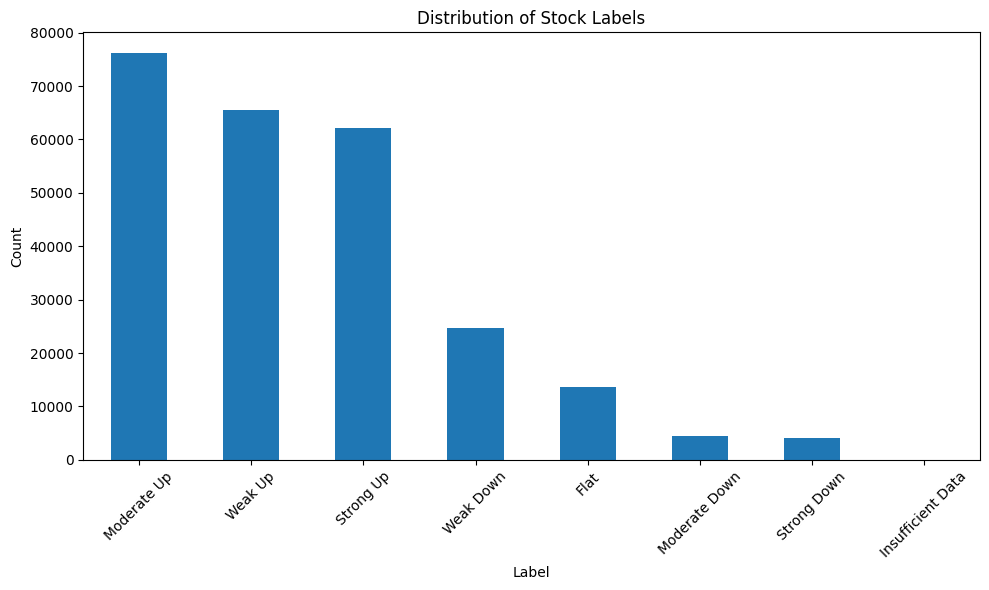

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['Label'].value_counts().plot(kind='bar')
plt.title('Distribution of Stock Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
print(f"Total data points: {len(df)}")
print(f"Unique stocks: {df['Ticker'].nunique()}")
print(f"Average data points per stock: {len(df) / df['Ticker'].nunique():.2f}")

Total data points: 250834
Unique stocks: 501
Average data points per stock: 500.67


In [29]:
final_labels = df.groupby('Ticker')['Label'].last()
print(final_labels.value_counts())

Label
Moderate Up          151
Weak Up              132
Strong Up            124
Weak Down             49
Flat                  27
Moderate Down          9
Strong Down            8
Insufficient Data      1
Name: count, dtype: int64


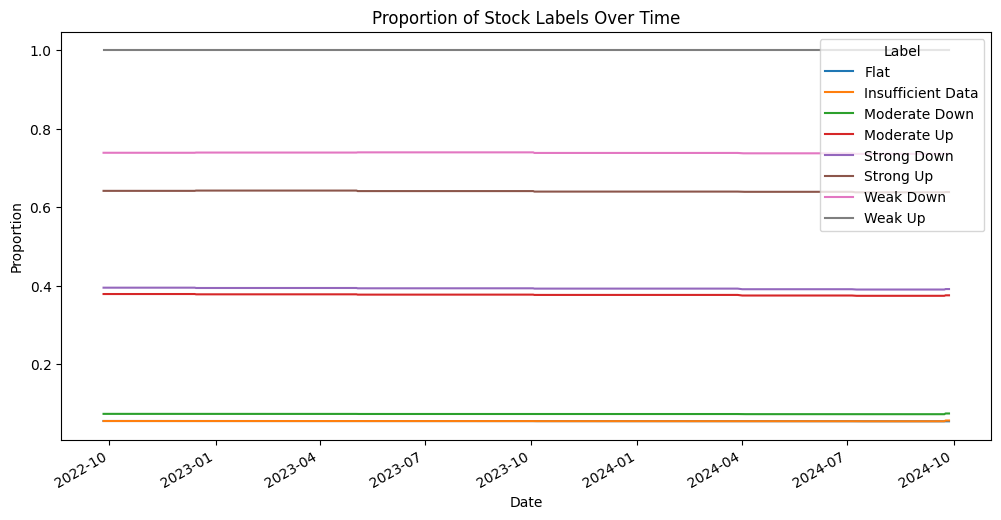

In [30]:
df['Date'] = pd.to_datetime(df['Date'])
label_trends = df.groupby('Date')['Label'].value_counts(normalize=True).unstack()
label_trends.plot(figsize=(12, 6), stacked=True)
plt.title('Proportion of Stock Labels Over Time')
plt.ylabel('Proportion')
plt.show()

In [32]:
df.columns

Index(['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Returns', 'SMA_50', 'EMA_20', 'RSI', 'BB_upper', 'BB_lower',
       'Volume_MA_5', 'Label'],
      dtype='object')

In [ ]:
import talib 

In [36]:
import pandas as pd
import numpy as np
import talib 
from sklearn.preprocessing import LabelEncoder

def prepare_data(df):
    # Ensure data is sorted by Date and Ticker
    df = df.sort_values(['Ticker', 'Date'])

    # Create additional features
    df['Close_Pct_Change'] = df.groupby('Ticker')['Close'].pct_change()
    df['Volume_Pct_Change'] = df.groupby('Ticker')['Volume'].pct_change()
    
    # Relative Strength Index (RSI) 14-day (if not already present)
    if 'RSI' not in df.columns:
        df['RSI'] = df.groupby('Ticker')['Close'].transform(lambda x: talib.RSI(x, timeperiod=14))
    
    # Moving Average Convergence Divergence (MACD)
    df['MACD'], df['MACD_Signal'], _ = df.groupby('Ticker')['Close'].transform(lambda x: talib.MACD(x))
    
    # Bollinger Bands Percentage
    df['BB_Pct'] = (df['Close'] - df['BB_lower']) / (df['BB_upper'] - df['BB_lower'])
    
    # Lagged features (previous 5 days)
    for i in range(1, 6):
        df[f'Close_Lag_{i}'] = df.groupby('Ticker')['Close'].shift(i)
        df[f'Volume_Lag_{i}'] = df.groupby('Ticker')['Volume'].shift(i)
    
    # Rolling mean and std of Returns
    df['Returns_Rolling_Mean'] = df.groupby('Ticker')['Returns'].rolling(window=30).mean().reset_index(0, drop=True)
    df['Returns_Rolling_Std'] = df.groupby('Ticker')['Returns'].rolling(window=30).std().reset_index(0, drop=True)
    
    # Encode the Label
    le = LabelEncoder()
    df['Label_Encoded'] = le.fit_transform(df['Label'])
    
    # Drop rows with NaN values
    df = df.dropna()
    
    # Select features for model
    features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Returns', 'SMA_50', 'EMA_20', 'RSI', 
                'BB_upper', 'BB_lower', 'Volume_MA_5', 'Close_Pct_Change', 'Volume_Pct_Change', 
                'MACD', 'MACD_Signal', 'BB_Pct', 'Returns_Rolling_Mean', 'Returns_Rolling_Std'] + \
               [f'Close_Lag_{i}' for i in range(1, 6)] + [f'Volume_Lag_{i}' for i in range(1, 6)]
    
    X = df[features]
    y = df['Label_Encoded']
    
    return X, y, le

# Prepare the data
X, y, label_encoder = prepare_data(df)

print("Features created:")
print(X.columns)
print("\nShape of feature matrix:", X.shape)
print("Number of classes:", len(label_encoder.classes_))

ValueError: Length of values (3) does not match length of index (505)

In [38]:
import pandas as pd
import numpy as np
import talib 
from sklearn.preprocessing import LabelEncoder

def prepare_data(df):
    # Ensure data is sorted by Date and Ticker
    df = df.sort_values(['Ticker', 'Date'])

    # Create additional features
    df['Close_Pct_Change'] = df.groupby('Ticker')['Close'].pct_change()
    df['Volume_Pct_Change'] = df.groupby('Ticker')['Volume'].pct_change()
    
    # Relative Strength Index (RSI) 14-day (if not already present)
    if 'RSI' not in df.columns:
        df['RSI'] = df.groupby('Ticker')['Close'].transform(lambda x: talib.RSI(x, timeperiod=14))
    
    # Moving Average Convergence Divergence (MACD)
    macd_results = df.groupby('Ticker')['Close'].apply(lambda x: talib.MACD(x)[0])
    macd_signal_results = df.groupby('Ticker')['Close'].apply(lambda x: talib.MACD(x)[1])
    
    df['MACD'] = macd_results.reset_index(level=0, drop=True)
    df['MACD_Signal'] = macd_signal_results.reset_index(level=0, drop=True)
    
    # Bollinger Bands Percentage
    df['BB_Pct'] = (df['Close'] - df['BB_lower']) / (df['BB_upper'] - df['BB_lower'])
    
    # Lagged features (previous 5 days)
    for i in range(1, 6):
        df[f'Close_Lag_{i}'] = df.groupby('Ticker')['Close'].shift(i)
        df[f'Volume_Lag_{i}'] = df.groupby('Ticker')['Volume'].shift(i)
    
    # Rolling mean and std of Returns
    df['Returns_Rolling_Mean'] = df.groupby('Ticker')['Returns'].rolling(window=30).mean().reset_index(0, drop=True)
    df['Returns_Rolling_Std'] = df.groupby('Ticker')['Returns'].rolling(window=30).std().reset_index(0, drop=True)

    # Calculate 14-day Relative Strength Index (RSI) for each Ticker group
    df['RSI_14'] = df.groupby('Ticker')['Close'].transform(lambda x: talib.RSI(x, timeperiod=14))

    # Calculate 28-day Relative Strength Index (RSI) for each Ticker group
    df['RSI_28'] = df.groupby('Ticker')['Close'].transform(lambda x: talib.RSI(x, timeperiod=28))

    # Calculate Average True Range (ATR) for each Ticker group and reset the index
    df['ATR'] = df.groupby('Ticker').apply(lambda x: talib.ATR(x['High'], x['Low'], x['Close'])).reset_index(level=0, drop=True)

    # Calculate On-Balance Volume (OBV) for each Ticker group and reset the index
    df['OBV'] = df.groupby('Ticker').apply(lambda x: talib.OBV(x['Close'], x['Volume'])).reset_index(level=0, drop=True)

    # Calculate 10-day momentum (percentage change) for each Ticker group
    df['Momentum'] = df.groupby('Ticker')['Close'].pct_change(periods=10)

    # Extract the day of the week from the Date column
    df['DayOfWeek'] = pd.to_datetime(df['Date']).dt.dayofweek

    # Extract the month from the Date column
    df['Month'] = pd.to_datetime(df['Date']).dt.month

    df['52W_High'] = df.groupby('Ticker')['Close'].transform(lambda x: x.rolling(window=252).max())
    df['52W_Low'] = df.groupby('Ticker')['Close'].transform(lambda x: x.rolling(window=252).min())
    df['Pct_From_52W_High'] = (df['Close'] - df['52W_High']) / df['52W_High']
    df['Pct_From_52W_Low'] = (df['Close'] - df['52W_Low']) / df['52W_Low']
    
    # Encode the Label
    le = LabelEncoder()
    df['Label_Encoded'] = le.fit_transform(df['Label'])
    
    # Drop rows with NaN values
    df = df.dropna()
    
    # # Select features for model
    # features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Returns', 'SMA_50', 'EMA_20', 'RSI', 
    #             'BB_upper', 'BB_lower', 'Volume_MA_5', 'Close_Pct_Change', 'Volume_Pct_Change', 
    #             'MACD', 'MACD_Signal', 'BB_Pct', 'Returns_Rolling_Mean', 'Returns_Rolling_Std'] + \
    #            [f'Close_Lag_{i}' for i in range(1, 6)] + [f'Volume_Lag_{i}' for i in range(1, 6)]
    
    features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Returns', 'SMA_50', 'EMA_20', 
            'RSI', 'RSI_14', 'RSI_28', 'BB_upper', 'BB_lower', 'Volume_MA_5', 
            'Close_Pct_Change', 'Volume_Pct_Change', 'MACD', 'MACD_Signal', 'BB_Pct', 
            'Returns_Rolling_Mean', 'Returns_Rolling_Std', 'ATR', 'OBV', 'Momentum', 
            'DayOfWeek', 'Month', 'Pct_From_52W_High', 'Pct_From_52W_Low'] + \
           [f'Close_Lag_{i}' for i in range(1, 6)] + [f'Volume_Lag_{i}' for i in range(1, 6)]
    
    X = df[features]
    y = df['Label_Encoded']
    
    return X, y, le

# Prepare the data
X, y, label_encoder = prepare_data(df)

print("Features created:")
print(X.columns)
print("\nShape of feature matrix:", X.shape)
print("Number of classes:", len(label_encoder.classes_))

Features created:
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Returns', 'SMA_50', 'EMA_20',
       'RSI', 'BB_upper', 'BB_lower', 'Volume_MA_5', 'Close_Pct_Change',
       'Volume_Pct_Change', 'MACD', 'MACD_Signal', 'BB_Pct',
       'Returns_Rolling_Mean', 'Returns_Rolling_Std', 'Close_Lag_1',
       'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5',
       'Volume_Lag_1', 'Volume_Lag_2', 'Volume_Lag_3', 'Volume_Lag_4',
       'Volume_Lag_5'],
      dtype='object')

Shape of feature matrix: (234330, 29)
Number of classes: 8


In [39]:
X.head()

,Open,High,Low,Close,Volume,Returns,SMA_50,EMA_20,RSI,BB_upper,...,Close_Lag_1,Close_Lag_2,Close_Lag_3,Close_Lag_4,Close_Lag_5,Volume_Lag_1,Volume_Lag_2,Volume_Lag_3,Volume_Lag_4,Volume_Lag_5
33,142.869995,146.720001,142.529999,146.300003,1591900.0,0.067883,137.656801,135.493335,69.220525,144.827683,...,137.000000,138.750000,138.029999,136.080002,134.460007,971200.0,1028100.0,1213600.0,1272100.0,1199400.0
34,147.119995,149.740005,146.350006,148.309998,1227500.0,0.013739,137.656801,136.713969,71.031464,146.632373,...,146.300003,137.000000,138.750000,138.029999,136.080002,1591900.0,971200.0,1028100.0,1213600.0,1272100.0
35,149.009995,149.710007,146.300003,146.380005,1220300.0,-0.013013,137.656801,137.634544,66.957764,148.014245,...,148.309998,146.300003,137.000000,138.750000,138.029999,1227500.0,1591900.0,971200.0,1028100.0,1213600.0
36,148.270004,149.460007,146.500000,148.000000,1299200.0,0.011067,137.656801,138.621730,68.586310,149.592491,...,146.380005,148.309998,146.300003,137.000000,138.750000,1220300.0,1227500.0,1591900.0,971200.0,1028100.0
37,148.190002,148.750000,146.350006,147.119995,1476700.0,-0.005946,137.656801,139.431089,66.664196,150.490932,...,148.000000,146.380005,148.309998,146.300003,137.000000,1299200.0,1220300.0,1227500.0,1591900.0,971200.0


In [51]:
import pandas as pd
import numpy as np
import talib 
from sklearn.preprocessing import LabelEncoder

def prepare_data(df):
    # Ensure data is sorted by Date and Ticker
    df = df.sort_values(['Ticker', 'Date'])

    # Create additional features
    df['Close_Pct_Change'] = df.groupby('Ticker')['Close'].pct_change()
    df['Volume_Pct_Change'] = df.groupby('Ticker')['Volume'].pct_change()
    
    # Relative Strength Index (RSI) 14-day (if not already present)
    if 'RSI' not in df.columns:
        df['RSI'] = df.groupby('Ticker')['Close'].transform(lambda x: talib.RSI(x, timeperiod=14))
    
    # Moving Average Convergence Divergence (MACD)
    macd_results = df.groupby('Ticker')['Close'].apply(lambda x: talib.MACD(x)[0])
    macd_signal_results = df.groupby('Ticker')['Close'].apply(lambda x: talib.MACD(x)[1])
    
    df['MACD'] = macd_results.reset_index(level=0, drop=True)
    df['MACD_Signal'] = macd_signal_results.reset_index(level=0, drop=True)
    
    # Bollinger Bands Percentage
    df['BB_Pct'] = (df['Close'] - df['BB_lower']) / (df['BB_upper'] - df['BB_lower'])
    
    # Lagged features (previous 5 days)
    for i in range(1, 6):
        df[f'Close_Lag_{i}'] = df.groupby('Ticker')['Close'].shift(i)
        df[f'Volume_Lag_{i}'] = df.groupby('Ticker')['Volume'].shift(i)
    
    # Rolling mean and std of Returns
    df['Returns_Rolling_Mean'] = df.groupby('Ticker')['Returns'].rolling(window=30).mean().reset_index(0, drop=True)
    df['Returns_Rolling_Std'] = df.groupby('Ticker')['Returns'].rolling(window=30).std().reset_index(0, drop=True)

    # Calculate 14-day Relative Strength Index (RSI) for each Ticker group
    df['RSI_14'] = df.groupby('Ticker')['Close'].transform(lambda x: talib.RSI(x, timeperiod=14))

    # Calculate 28-day Relative Strength Index (RSI) for each Ticker group
    df['RSI_28'] = df.groupby('Ticker')['Close'].transform(lambda x: talib.RSI(x, timeperiod=28))

    # Calculate Average True Range (ATR) for each Ticker group and reset the index
    df['ATR'] = df.groupby('Ticker').apply(lambda x: talib.ATR(x['High'], x['Low'], x['Close'])).reset_index(level=0, drop=True)

    # Calculate On-Balance Volume (OBV) for each Ticker group and reset the index
    df['OBV'] = df.groupby('Ticker').apply(lambda x: talib.OBV(x['Close'], x['Volume'])).reset_index(level=0, drop=True)

    # Calculate 10-day momentum (percentage change) for each Ticker group
    df['Momentum'] = df.groupby('Ticker')['Close'].pct_change(periods=10)

    # Extract the day of the week from the Date column
    df['DayOfWeek'] = pd.to_datetime(df['Date']).dt.dayofweek

    # Extract the month from the Date column
    df['Month'] = pd.to_datetime(df['Date']).dt.month

    df['52W_High'] = df.groupby('Ticker')['Close'].transform(lambda x: x.rolling(window=252).max())
    df['52W_Low'] = df.groupby('Ticker')['Close'].transform(lambda x: x.rolling(window=252).min())
    df['Pct_From_52W_High'] = (df['Close'] - df['52W_High']) / df['52W_High']
    df['Pct_From_52W_Low'] = (df['Close'] - df['52W_Low']) / df['52W_Low']
    
    # Encode the Label
    le = LabelEncoder()
    df['Label_Encoded'] = le.fit_transform(df['Label'])
    
    # Drop rows with NaN values
    df = df.dropna()
    
    # # Select features for model
    # features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Returns', 'SMA_50', 'EMA_20', 'RSI', 
    #             'BB_upper', 'BB_lower', 'Volume_MA_5', 'Close_Pct_Change', 'Volume_Pct_Change', 
    #             'MACD', 'MACD_Signal', 'BB_Pct', 'Returns_Rolling_Mean', 'Returns_Rolling_Std'] + \
    #            [f'Close_Lag_{i}' for i in range(1, 6)] + [f'Volume_Lag_{i}' for i in range(1, 6)]
    
    features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Returns', 'SMA_50', 'EMA_20', 
            'RSI', 'RSI_14', 'RSI_28', 'BB_upper', 'BB_lower', 'Volume_MA_5', 
            'Close_Pct_Change', 'Volume_Pct_Change', 'MACD', 'MACD_Signal', 'BB_Pct', 
            'Returns_Rolling_Mean', 'Returns_Rolling_Std', 'ATR', 'OBV', 'Momentum', 
            'DayOfWeek', 'Month', 'Pct_From_52W_High', 'Pct_From_52W_Low'] + \
           [f'Close_Lag_{i}' for i in range(1, 6)] + [f'Volume_Lag_{i}' for i in range(1, 6)]
    
    X = df[features]
    y = df['Label_Encoded']
    
    return X, y, le , df

# Prepare the data
X, y, label_encoder , df_final = prepare_data(df)

print("Features created:")
print(X.columns)
print("\nShape of feature matrix:", X.shape)
print("Number of classes:", len(label_encoder.classes_))

# add code to save X,y and le 
# X.to_csv('X.csv', index=False)
y.to_csv('y.csv', index=False)
import pickle
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

/var/folders/7q/9t1f98rn10x46qx3z1s8kvp00000gp/T/ipykernel_38570/3935435839.py:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['ATR'] = df.groupby('Ticker').apply(lambda x: talib.ATR(x['High'], x['Low'], x['Close'])).reset_index(level=0, drop=True)
/var/folders/7q/9t1f98rn10x46qx3z1s8kvp00000gp/T/ipykernel_38570/3935435839.py:47: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['OBV'] = df.groupby('Tic

Features created:
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Returns', 'SMA_50', 'EMA_20',
       'RSI', 'RSI_14', 'RSI_28', 'BB_upper', 'BB_lower', 'Volume_MA_5',
       'Close_Pct_Change', 'Volume_Pct_Change', 'MACD', 'MACD_Signal',
       'BB_Pct', 'Returns_Rolling_Mean', 'Returns_Rolling_Std', 'ATR', 'OBV',
       'Momentum', 'DayOfWeek', 'Month', 'Pct_From_52W_High',
       'Pct_From_52W_Low', 'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3',
       'Close_Lag_4', 'Close_Lag_5', 'Volume_Lag_1', 'Volume_Lag_2',
       'Volume_Lag_3', 'Volume_Lag_4', 'Volume_Lag_5'],
      dtype='object')

Shape of feature matrix: (125775, 38)
Number of classes: 8


In [44]:
X.head()

,Open,High,Low,Close,Volume,Returns,SMA_50,EMA_20,RSI,RSI_14,...,Close_Lag_1,Close_Lag_2,Close_Lag_3,Close_Lag_4,Close_Lag_5,Volume_Lag_1,Volume_Lag_2,Volume_Lag_3,Volume_Lag_4,Volume_Lag_5
251,110.879997,112.250000,110.680000,110.730003,1399800.0,-0.010809,120.515801,114.623902,34.905658,34.905658,...,111.940002,111.410004,109.730003,112.470001,112.309998,987400.0,2050500.0,1327900.0,1744900.0,2222400.0
252,110.959999,111.250000,109.620003,110.500000,2268300.0,-0.002077,120.334601,114.231150,34.433096,34.433096,...,110.730003,111.940002,111.410004,109.730003,112.470001,1399800.0,987400.0,2050500.0,1327900.0,1744900.0
253,110.480003,112.680000,110.440002,112.000000,1959900.0,0.013575,120.113001,114.018659,40.126106,40.126107,...,110.500000,110.730003,111.940002,111.410004,109.730003,2268300.0,1399800.0,987400.0,2050500.0,1327900.0
254,113.120003,113.169998,111.449997,111.820000,1830100.0,-0.001607,119.858401,113.809263,39.680855,39.680856,...,112.000000,110.500000,110.730003,111.940002,111.410004,1959900.0,2268300.0,1399800.0,987400.0,2050500.0
255,110.900002,111.800003,109.769997,110.900002,1569000.0,-0.008227,119.524001,113.532191,37.396779,37.396779,...,111.820000,112.000000,110.500000,110.730003,111.940002,1830100.0,1959900.0,2268300.0,1399800.0,987400.0


In [45]:
X.to_csv('prepared_data.csv', index=False)

In [52]:
df_final.head(3)

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume,Returns,SMA_50,...,ATR,OBV,Momentum,DayOfWeek,Month,52W_High,52W_Low,Pct_From_52W_High,Pct_From_52W_Low,Label_Encoded
251,2023-09-26,A,110.879997,112.25,110.680000,110.730003,109.762909,1399800.0,-0.010809,120.515801,...,2.768456,-14583200.0,-0.018177,1,9,159.059998,109.730003,-0.303848,0.009113,3
252,2023-09-27,A,110.959999,111.25,109.620003,110.500000,109.534920,2268300.0,-0.002077,120.334601,...,2.687138,-16851500.0,-0.025831,2,9,159.059998,109.730003,-0.305294,0.007017,3
253,2023-09-28,A,110.480003,112.68,110.440002,112.000000,111.021812,1959900.0,0.013575,120.113001,...,2.655199,-14891600.0,-0.025070,3,9,159.059998,109.730003,-0.295863,0.020687,3


In [54]:
df_final.to_csv('final_df.csv', index=False)

In [5]:
# final_df = pd.read_csv('final_df.csv')
# final_df.head()
print(final_df['Label_Encoded'].value_counts(dropna=False))

Label_Encoded
3    38354
7    32766
5    31185
6    12294
0     6858
2     2286
4     2032
Name: count, dtype: int64


In [50]:
X, y, label_encoder , df_final = prepare_data(df)

/var/folders/7q/9t1f98rn10x46qx3z1s8kvp00000gp/T/ipykernel_38570/2596576207.py:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['ATR'] = df.groupby('Ticker').apply(lambda x: talib.ATR(x['High'], x['Low'], x['Close'])).reset_index(level=0, drop=True)
/var/folders/7q/9t1f98rn10x46qx3z1s8kvp00000gp/T/ipykernel_38570/2596576207.py:47: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['OBV'] = df.groupby('Tic

ValueError: not enough values to unpack (expected 4, got 3)

In [3]:
import pandas as pd
newlabelled = pd.read_csv('../labeled_data.csv')

# Display distribution of labels
print(newlabelled['Label'].value_counts(normalize=True))

/var/folders/7q/9t1f98rn10x46qx3z1s8kvp00000gp/T/ipykernel_93364/1148250866.py:2: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  newlabelled = pd.read_csv('../labeled_data.csv')


Label
Weak Up              0.351297
Moderate Up          0.305389
Strong Up            0.167665
Weak Down            0.087824
Flat                 0.035928
Moderate Down        0.029940
Strong Down          0.019960
Insufficient Data    0.001996
Name: proportion, dtype: float64


In [9]:
from scipy import stats
import numpy as np
def label_stock(group):
    if len(group) < 22:  # Not enough data for recent return calculation
        return pd.DataFrame({'Label': ['Insufficient Data'] * len(group)})
    
    group = group.sort_values('Date')
    
    try:
        x = np.arange(len(group))
        slope, _, _, _, _ = stats.linregress(x, group['Close'])
        
        total_return = (group['Close'].iloc[-1] / group['Close'].iloc[0]) - 1
        recent_return = (group['Close'].iloc[-1] / group['Close'].iloc[-22]) - 1
        
        if total_return > 0.2 and recent_return > 0.05:
            label = 'Strong Up'
        elif total_return > 0.1 and recent_return > 0:
            label = 'Moderate Up'
        elif total_return > 0.05 or (slope > 0 and recent_return > 0):
            label = 'Weak Up'
        elif total_return < -0.2 and recent_return < -0.05:
            label = 'Strong Down'
        elif total_return < -0.1 and recent_return < 0:
            label = 'Moderate Down'
        elif total_return < -0.05 or (slope < 0 and recent_return < 0):
            label = 'Weak Down'
        else:
            label = 'Flat'
        
        return pd.DataFrame({'Label': [label] * len(group)})
    except Exception as e:
        print(f"Error processing group: {e}")
        return pd.DataFrame({'Label': ['Error'] * len(group)})

# Apply labeling to each stock
df_grouped = newlabelled.groupby('Ticker')
newlabelled['Label'] = df_grouped.apply(label_stock).reset_index(drop=True)['Label']

# Display distribution of labels
print(newlabelled['Label'].value_counts(dropna=False))



Label
Weak Up              87631
Moderate Up          77112
Strong Up            41906
Weak Down            22027
Flat                  9072
Moderate Down         7560
Strong Down           5040
Insufficient Data        6
Name: count, dtype: int64


/var/folders/7q/9t1f98rn10x46qx3z1s8kvp00000gp/T/ipykernel_93364/840099790.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  newlabelled['Label'] = df_grouped.apply(label_stock).reset_index(drop=True)['Label']


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# Function to calculate additional technical indicators
def calculate_technical_indicators(df):
    # Simple Moving Average (SMA) and Exponential Moving Average (EMA)
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

    # Relative Strength Index (RSI)
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI_14'] = 100 - (100 / (1 + rs))

    # Bollinger Bands
    rolling_mean = df['Close'].rolling(window=20).mean()
    rolling_std = df['Close'].rolling(window=20).std()
    df['BB_upper'] = rolling_mean + (rolling_std * 2)
    df['BB_lower'] = rolling_mean - (rolling_std * 2)

    # Momentum
    df['Momentum'] = df['Close'] - df['Close'].shift(14)

    # 52-week High and Low
    df['52W_High'] = df['Close'].rolling(window=252).max()
    df['52W_Low'] = df['Close'].rolling(window=252).min()

    return df

# Main function to label stock
def label_stock(df):
    if len(df) < 252:  # Minimum 1 year of data
        df['Label_Daily'] = ['Insufficient Data'] * len(df)
        df['Label_2_Year'] = 'Insufficient Data'
        return df

    df = df.sort_values('Date')
    
    try:
        # Calculate technical indicators
        df = calculate_technical_indicators(df)

        # Calculate returns
        total_return = (df['Close'].iloc[-1] / df['Close'].iloc[0]) - 1
        
        # Linear regression for trend
        x = np.arange(len(df))
        slope, _, _, _, _ = stats.linregress(x, df['Close'])

        # Volatility
        returns = df['Close'].pct_change()
        volatility = returns.std() * np.sqrt(252)  # Annualized volatility

        # Define 52-week metrics
        pct_from_52w_high = (df['Close'].iloc[-1] - df['52W_High'].iloc[-1]) / df['52W_High'].iloc[-1]
        pct_from_52w_low = (df['Close'].iloc[-1] - df['52W_Low'].iloc[-1]) / df['52W_Low'].iloc[-1]

        # RSI-based conditions
        current_rsi = df['RSI_14'].iloc[-1]

        # Momentum
        momentum = df['Momentum'].iloc[-1]

        # 2-Year Label
        if total_return > 0.2 and current_rsi > 60 and pct_from_52w_high < 0.1:
            label_2_year = 'Strong Up'
        elif total_return > 0.05 and current_rsi > 50 and momentum > 0:
            label_2_year = 'Moderate Up'
        elif total_return < -0.2 and current_rsi < 30 and pct_from_52w_low > -0.1:
            label_2_year = 'Strong Down'
        elif total_return < -0.05 and current_rsi < 50 and momentum < 0:
            label_2_year = 'Moderate Down'
        elif volatility > 0.4:
            label_2_year = 'Volatile'
        else:
            label_2_year = 'Flat'

        # Daily labels (simplified)
        daily_returns = df['Close'].pct_change()
        daily_labels = pd.cut(daily_returns, 
                              bins=[-np.inf, -0.02, -0.005, 0.005, 0.02, np.inf], 
                              labels=['Strong Down', 'Weak Down', 'Flat', 'Weak Up', 'Strong Up'])

        df['Label_Daily'] = daily_labels
        df['Label_2_Year'] = label_2_year
        return df

    except Exception as e:
        print(f"Error processing group: {e}")
        df['Label_Daily'] = ['Error'] * len(df)
        df['Label_2_Year'] = 'Error'
        return df

# Assuming you load a dataframe with stock data
if file_path:
    df = pd.read_csv(file_path)
    stocks = df['Ticker'].unique()

    results = []
    for stock in stocks:
        stock_df = df[df['Ticker'] == stock]
        labeled_stock_df = label_stock(stock_df)
        results.append(labeled_stock_df)

    final_df = pd.concat(results, axis=0, ignore_index=True)
    final_df.to_csv('labeled_data_with_technical_indicators.csv', index=False)


In [ ]:
# Check for any stocks with 'Insufficient Data' or 'Error' labels
problematic_stocks = df[df['Label'].isin(['Insufficient Data', 'Error'])]['Ticker'].unique()
if len(problematic_stocks) > 0:
    print(f"Stocks with issues: {problematic_stocks}")

In [10]:
import pandas as pd
predicted = pd.read_csv('../predicted.csv')

# Display distribution of labels
print(predicted['Label'].value_counts(normalize=True))

Label
Weak Up              0.350028
Moderate Up          0.308012
Strong Up            0.167387
Weak Down            0.087983
Flat                 0.036237
Moderate Down        0.030197
Strong Down          0.020131
Insufficient Data    0.000024
Name: proportion, dtype: float64


In [12]:
print(predicted['Label_7_Encoded'].value_counts(normalize=True))
print(predicted['predicted_7'].value_counts(normalize=True))

Label_7_Encoded
7    0.350028
3    0.308012
5    0.167387
6    0.087983
0    0.036237
2    0.030197
4    0.020131
1    0.000024
Name: proportion, dtype: float64
predicted_7
7    0.330025
3    0.304445
5    0.178224
6    0.103793
2    0.033181
0    0.032194
4    0.018114
1    0.000024
Name: proportion, dtype: float64


In [3]:
predictions = pd.read_csv('../predicted_with_5_class.csv') 
predictions['Date'] = pd.to_datetime(predictions['Date'] , format='mixed')

predictions.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,30D_MA,60D_MA,...,SMA_50,EMA_20,OBV_SMA_ratio,High_Low_Range,Label,Label_7_Encoded,predicted_7,label_5,label_5_encoded,predicted_5
0,2022-09-29,94.448158,94.816055,93.311035,93.896324,85.036545,2769697.0,MMM,NaN,NaN,...,NaN,93.896324,NaN,1.505020,Moderate Up,3,3,Weak Up,4,Weak Up
1,2022-09-30,93.645485,94.607025,92.299332,92.391304,83.673523,3722909.0,MMM,NaN,NaN,...,NaN,93.752989,NaN,2.307693,Moderate Up,3,3,Weak Up,4,Weak Up
2,2022-10-03,93.386292,95.334450,92.734116,94.665550,85.733185,3487536.0,MMM,NaN,NaN,...,NaN,93.839900,NaN,2.600334,Moderate Up,3,3,Weak Up,4,Weak Up


In [4]:
predictions.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Ticker',
       '30D_MA', '60D_MA', '30D_STD', 'Log_Return', 'Volatility', 'RSI',
       'MACD', 'MACD_Signal', 'MACD_Hist', 'ATR', 'OBV', 'Close_Lag_1',
       'Volume_Lag_1', 'Close_Lag_2', 'Volume_Lag_2', 'Close_Lag_3',
       'Volume_Lag_3', 'Close_Lag_4', 'Volume_Lag_4', 'Close_Lag_5',
       'Volume_Lag_5', 'RSI_14', 'RSI_28', 'BB_upper', 'BB_middle', 'BB_lower',
       'BB_Pct', 'SMA_50', 'EMA_20', 'OBV_SMA_ratio', 'High_Low_Range',
       'Label', 'Label_7_Encoded', 'predicted_7', 'label_5', 'label_5_encoded',
       'predicted_5'],
      dtype='object')

In [5]:
predictions[predictions['predicted_5'] == 'Strong Up'].head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,30D_MA,60D_MA,...,SMA_50,EMA_20,OBV_SMA_ratio,High_Low_Range,Label,Label_7_Encoded,predicted_7,label_5,label_5_encoded,predicted_5
13104,2024-09-24,101.839996,103.019997,101.279999,101.410004,101.410004,3226900.0,AEP,100.706333,97.326500,...,99.0696,101.850257,5.665140e+07,1.739998,Strong Up,5,5,Strong Up,2,Strong Up
13105,2024-09-25,101.559998,101.910004,100.790001,101.150002,101.150002,2650100.0,AEP,100.807000,97.557666,...,99.2556,101.783566,5.651854e+07,1.120003,Strong Up,5,5,Strong Up,2,Strong Up
13106,2024-09-26,101.000000,101.400002,100.540001,100.739998,100.739998,2436600.0,AEP,100.923667,97.776333,...,99.4000,101.684179,5.641192e+07,0.860001,Strong Up,5,5,Strong Up,2,Strong Up
13107,2024-09-27,101.239998,102.139999,101.000000,101.839996,101.839996,2019100.0,AEP,101.099667,98.014333,...,99.5670,101.699019,5.633759e+07,1.139999,Strong Up,5,5,Strong Up,2,Strong Up
13108,2024-09-30,101.870003,102.919998,101.410004,102.599998,102.599998,2890400.0,AEP,101.288333,98.260000,...,99.7562,101.784826,5.625971e+07,1.509995,Strong Up,5,5,Strong Up,2,Strong Up


In [27]:
ticker_counts = predictions.groupby('Ticker')['predicted_5'].nunique().reset_index()
multiple_predicted_5 = ticker_counts[ticker_counts['predicted_5'] > 1]
multiple_predicted_5.sort_values(by='predicted_5', ascending=False)

In [22]:
multiple_predicted_5.sort_values(by='predicted_5', ascending=False)

,Ticker,predicted_5
132,DG,4
156,EL,3
474,VST,3
411,SMCI,3
249,ISRG,3
...,...,...
204,GL,2
207,GNRC,2
211,GPN,2
212,GRMN,2


In [29]:
ticker_counts = predictions.groupby('Ticker')['predicted_5'].nunique().reset_index()
multiple_predicted_5 = ticker_counts[ticker_counts['predicted_5'] == 1]
multiple_predicted_5.sort_values(by='predicted_5', ascending=False)

,Ticker,predicted_5
1,AAPL,1
304,META,1
312,MNST,1
311,MMM,1
310,MMC,1
...,...,...
154,EG,1
153,EFX,1
152,ED,1
151,ECL,1


In [30]:
predictions.groupby('Ticker')['predicted_5'].value_counts().unstack().fillna(0)

predicted_5,Flat,Strong Down,Strong Up,Weak Down,Weak Up
Ticker,,,,,
A,0.0,0.0,0.0,502.0,2.0
AAPL,0.0,0.0,0.0,0.0,504.0
ABBV,0.0,0.0,0.0,0.0,504.0
ABNB,0.0,0.0,0.0,0.0,504.0
ABT,0.0,0.0,0.0,0.0,504.0
...,...,...,...,...,...
XYL,0.0,0.0,171.0,0.0,333.0
YUM,0.0,0.0,491.0,0.0,13.0
ZBH,0.0,0.0,364.0,0.0,140.0


In [6]:
strong_up_tickers = predictions.groupby('Ticker')['predicted_5'].apply(lambda x: (x == 'Strong Down').all()).reset_index()
strong_up_tickers = strong_up_tickers[strong_up_tickers['predicted_5']]
strong_up_tickers

,Ticker,predicted_5
35,AON,True
53,BAX,True
126,DAY,True
150,EBAY,True
153,EFX,True
225,HON,True
298,MCHP,True
319,MRNA,True


In [1]:
predictions = pd.read_csv('../labeled_data_updated.csv') 
predictions['Date'] = pd.to_datetime(predictions['Date'] , format='mixed')

predictions.head(3)
strong_up_tickers = predictions.groupby('Ticker')['Label_new'].apply(lambda x: (x == 'Strong Down').all()).reset_index()
strong_up_tickers = strong_up_tickers[strong_up_tickers['Label_new']]
strong_up_tickers

NameError: name 'pd' is not defined

In [53]:
raw_df = pd.read_csv('../prepared_data_2024-10-02.csv') 
raw_df['Date'] = pd.to_datetime(raw_df['Date'])
raw_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,30D_MA,60D_MA,...,RSI_14,RSI_28,BB_upper,BB_middle,BB_lower,BB_Pct,SMA_50,EMA_20,OBV_SMA_ratio,High_Low_Range
0,2022-09-29,94.448158,94.816055,93.311035,93.896324,85.036545,2769697.0,MMM,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.896324,NaN,1.505020
1,2022-09-30,93.645485,94.607025,92.299332,92.391304,83.673523,3722909.0,MMM,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.752989,NaN,2.307693
2,2022-10-03,93.386292,95.334450,92.734116,94.665550,85.733185,3487536.0,MMM,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.839900,NaN,2.600334
3,2022-10-04,95.936455,96.973244,95.894646,96.672241,87.550522,3352029.0,MMM,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.109646,NaN,1.078598
4,2022-10-05,95.602005,97.073578,94.832779,96.295990,87.209793,3061880.0,MMM,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.317870,NaN,2.240799


In [65]:
import numpy as np
import pandas as pd
from scipy import stats

def label_stock(group):
    if len(group) < 252:  # Minimum 1 year of data
        return pd.DataFrame({'Label_Daily': ['Insufficient Data'] * len(group), 'Label_2_Year': 'Insufficient Data'})
    
    group = group.sort_values('Date')
    
    try:
        # Calculate returns
        total_return = (group['Close'].iloc[-1] / group['Close'].iloc[0]) - 1
        print("total_return: " , total_return)
        # Calculate trend using linear regression
        x = np.arange(len(group))
        slope, _, _, _, _ = stats.linregress(x, group['Close'])
        
        # Volatility
        returns = group['Close'].pct_change()
        volatility = returns.std() * np.sqrt(252)  # Annualized volatility
        
        # 2-Year Label
        if total_return > 0.2:
            label_2_year = 'Strong Up'
        elif total_return > 0.05:
            label_2_year = 'Moderate Up'
        elif total_return < -0.2:
            label_2_year = 'Strong Down'
        elif total_return < -0.05:
            label_2_year = 'Moderate Down'
        elif volatility > 0.4:
            label_2_year = 'Volatile'
        else:
            label_2_year = 'Flat'
        
        # Daily labels (simplified)
        daily_returns = group['Close'].pct_change()
        daily_labels = pd.cut(daily_returns, 
                              bins=[-np.inf, -0.02, -0.005, 0.005, 0.02, np.inf], 
                              labels=['Strong Down', 'Weak Down', 'Flat', 'Weak Up', 'Strong Up'])
        
        return pd.DataFrame({'Label_Daily': daily_labels, 'Label_2_Year': label_2_year})
    
    except Exception as e:
        print(f"Error processing group: {e}")
        return pd.DataFrame({'Label_Daily': ['Error'] * len(group), 'Label_2_Year': 'Error'})

stocks = ['GOOG','GOOGL','AAPL','DG']
google = raw_df[raw_df['Ticker'].isin(stocks)]

# result = google.groupby('Ticker').apply(label_stock).reset_index(level=0, drop=True)
grouped = google.groupby('Ticker')
# Print the number of groups and their names
print("Number of groups:", len(grouped))
print("Group names (Tickers):", grouped.groups.keys())

result = grouped.apply(label_stock).reset_index(level=0, drop=True)
# Print the result to check the output
print("Result after applying label_stock:")
print(result.tail(3))  #


# Reset the index of the result DataFrame to ensure it aligns with df
result = result.reset_index(drop=True)
# print shape before concatenating

# Concatenate the DataFrames
df_google = pd.concat([google, result], axis=1)
print('=================================')
print("result shape : ", result.shape)
print("google shape : ", google.shape)
print("df_google shape: ", df_google.shape)
print('=================================')
# df.to_csv('labeled_data_updated.csv', index=False)

print("\nDaily Label Distribution:")

print(result['Label_Daily'].value_counts(dropna=False))
print("\n2-Year Label Distribution:")
print(result['Label_2_Year'].value_counts(dropna=False))

print('=================================')
print("\nDaily Label Distribution:")

print(df_google['Label_Daily'].value_counts(dropna=False))
print("\n2-Year Label Distribution:")
print(df_google['Label_2_Year'].value_counts(dropna=False))


Number of groups: 4
Group names (Tickers): dict_keys(['AAPL', 'DG', 'GOOG', 'GOOGL'])
total_return:  0.5876615208947853
total_return:  -0.647262701841084
total_return:  0.7169946422343509
total_return:  0.714124498376306
Result after applying label_stock:
      Label_Daily Label_2_Year
10077     Weak Up    Strong Up
10078     Weak Up    Strong Up
10079     Weak Up    Strong Up
result shape :  (2016, 2)
google shape :  (2016, 39)
df_google shape:  (4032, 41)

Daily Label Distribution:
Label_Daily
Weak Up        599
Flat           515
Weak Down      493
Strong Up      207
Strong Down    198
NaN              4
Name: count, dtype: int64

2-Year Label Distribution:
Label_2_Year
Strong Up      1512
Strong Down     504
Name: count, dtype: int64

Daily Label Distribution:
Label_Daily
NaN            2020
Weak Up         599
Flat            515
Weak Down       493
Strong Up       207
Strong Down     198
Name: count, dtype: int64

2-Year Label Distribution:
Label_2_Year
NaN            2016
Strong

/var/folders/7q/9t1f98rn10x46qx3z1s8kvp00000gp/T/ipykernel_36100/2844638781.py:58: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = grouped.apply(label_stock).reset_index(level=0, drop=True)


In [82]:
import numpy as np
import pandas as pd
from scipy import stats

def label_stock(group):
    if len(group) < 252:  # Minimum 1 year of data
        return pd.DataFrame({'Label_Daily': ['Insufficient Data'] * len(group), 'Label_2_Year': 'Insufficient Data'})
    
    group = group.sort_values('Date')
    
    try:
        # Calculate returns
        total_return = (group['Close'].iloc[-1] / group['Close'].iloc[0]) - 1
        print("total_return: " , total_return)
        # Calculate trend using linear regression
        x = np.arange(len(group))
        slope, _, _, _, _ = stats.linregress(x, group['Close'])
        
        # Volatility
        returns = group['Close'].pct_change()
        volatility = returns.std() * np.sqrt(252)  # Annualized volatility
        
        # 2-Year Label
        if total_return > 0.2:
            label_2_year = 'Strong Up'
        elif total_return > 0.05:
            label_2_year = 'Moderate Up'
        elif total_return < -0.2:
            label_2_year = 'Strong Down'
        elif total_return < -0.05:
            label_2_year = 'Moderate Down'
        elif volatility > 0.4:
            label_2_year = 'Volatile'
        else:
            label_2_year = 'Flat'
        
        # Daily labels (simplified)
        daily_returns = group['Close'].pct_change()
        daily_labels = pd.cut(daily_returns, 
                              bins=[-np.inf, -0.02, -0.005, 0.005, 0.02, np.inf], 
                              labels=['Strong Down', 'Weak Down', 'Flat', 'Weak Up', 'Strong Up'])
        
        return pd.DataFrame({'Label_Daily': daily_labels, 'Label_2_Year': label_2_year})
    
    except Exception as e:
        print(f"Error processing group: {e}")
        return pd.DataFrame({'Label_Daily': ['Error'] * len(group), 'Label_2_Year': 'Error'})

stocks = ['GOOG','DG']
google = raw_df[raw_df['Ticker'].isin(stocks)]
# google = raw_df


# result = google.groupby('Ticker').apply(label_stock).reset_index(level=0, drop=True)
grouped = google.groupby('Ticker')
# Print the number of groups and their names
print("Number of groups:", len(grouped))
print("Group names (Tickers):", grouped.groups.keys())

result = grouped.apply(label_stock).reset_index(level=0, drop=True)
# Print the result to check the output
print("Result after applying label_stock:")
print(result.tail(3))  #


# Reset the index of the result DataFrame to ensure it aligns with df
result = result.reset_index(drop=True)
# print shape before concatenating
google = google.reset_index(drop=True)
df_google = pd.concat([google, result], axis=1)
# Concatenate the DataFrames
# df_google = pd.concat([google, result], axis=1, ignore_index=True)
print('=================================')
print("result shape : ", result.shape)
print("google shape : ", google.shape)
print("df_google shape: ", df_google.shape)
print('=================================')
# df.to_csv('labeled_data_updated.csv', index=False)

print("\nDaily Label Distribution:")

print(result['Label_Daily'].value_counts(dropna=False))
print("\n2-Year Label Distribution:")
print(result['Label_2_Year'].value_counts(dropna=False))

print('=================================')
print("\nDaily Label Distribution:")

print(df_google['Label_Daily'].value_counts(dropna=False))
print("\n2-Year Label Distribution:")
print(df_google['Label_2_Year'].value_counts(dropna=False))


Number of groups: 2
Group names (Tickers): dict_keys(['DG', 'GOOG'])
total_return:  -0.647262701841084
total_return:  0.7169946422343509
Result after applying label_stock:
      Label_Daily Label_2_Year
10581     Weak Up    Strong Up
10582     Weak Up    Strong Up
10583     Weak Up    Strong Up
result shape :  (1008, 2)
google shape :  (1008, 39)
df_google shape:  (1008, 41)

Daily Label Distribution:
Label_Daily
Weak Up        289
Flat           252
Weak Down      247
Strong Down    109
Strong Up      109
NaN              2
Name: count, dtype: int64

2-Year Label Distribution:
Label_2_Year
Strong Down    504
Strong Up      504
Name: count, dtype: int64

Daily Label Distribution:
Label_Daily
Weak Up        289
Flat           252
Weak Down      247
Strong Down    109
Strong Up      109
NaN              2
Name: count, dtype: int64

2-Year Label Distribution:
Label_2_Year
Strong Down    504
Strong Up      504
Name: count, dtype: int64


/var/folders/7q/9t1f98rn10x46qx3z1s8kvp00000gp/T/ipykernel_36100/1601826197.py:60: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = grouped.apply(label_stock).reset_index(level=0, drop=True)


In [83]:
df_google.head(2)
stocks = ['GOOG']
google = df_google[df_google['Ticker'].isin(stocks)]
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,30D_MA,60D_MA,...,BB_upper,BB_middle,BB_lower,BB_Pct,SMA_50,EMA_20,OBV_SMA_ratio,High_Low_Range,Label_Daily,Label_2_Year
0,2022-09-29,99.300003,99.300003,96.519997,98.089996,97.849693,21921500.0,GOOG,NaN,NaN,...,184.278128,155.750002,127.221875,-0.510582,NaN,98.089996,NaN,2.780006,NaN,Strong Down
1,2022-09-30,97.730003,99.494003,96.029999,96.150002,95.914452,26277800.0,GOOG,NaN,NaN,...,191.250943,152.695501,114.140059,-0.233301,NaN,97.905235,NaN,3.464005,Flat,Strong Down
2,2022-10-03,97.220001,99.970001,97.019997,99.300003,99.056732,24840000.0,GOOG,NaN,NaN,...,195.164043,150.114502,105.064960,-0.063985,NaN,98.038070,NaN,2.950005,Strong Up,Strong Down
3,2022-10-04,101.040001,102.720001,101.040001,102.410004,102.159119,22580900.0,GOOG,NaN,NaN,...,197.425841,147.799501,98.173161,0.042687,NaN,98.454445,NaN,1.680000,Weak Down,Strong Down
4,2022-10-05,100.690002,102.739998,99.739998,102.220001,101.969582,18475500.0,GOOG,NaN,NaN,...,198.924269,145.477501,92.030734,0.095322,NaN,98.813069,NaN,3.000000,Weak Down,Strong Down


In [86]:
import numpy as np
import pandas as pd
from scipy import stats

def label_stock(df):
    if len(df) < 252:  # Minimum 1 year of data
        df['Label_Daily'] = ['Insufficient Data'] * len(df)
        df['Label_2_Year'] = 'Insufficient Data'
        return df
    
    df = df.sort_values('Date')
    
    try:
        # Calculate returns
        total_return = (df['Close'].iloc[-1] / df['Close'].iloc[0]) - 1
        # print("total_return: ", total_return)
        # Calculate trend using linear regression
        x = np.arange(len(df))
        slope, _, _, _, _ = stats.linregress(x, df['Close'])
        
        # Volatility
        returns = df['Close'].pct_change()
        volatility = returns.std() * np.sqrt(252)  # Annualized volatility
        
        # 2-Year Label
        if total_return > 0.2:
            label_2_year = 'Strong Up'
        elif total_return > 0.05:
            label_2_year = 'Moderate Up'
        elif total_return < -0.2:
            label_2_year = 'Strong Down'
        elif total_return < -0.05:
            label_2_year = 'Moderate Down'
        elif volatility > 0.4:
            label_2_year = 'Volatile'
        else:
            label_2_year = 'Flat'
        
        # Daily labels (simplified)
        daily_returns = df['Close'].pct_change()
        daily_labels = pd.cut(daily_returns, 
                              bins=[-np.inf, -0.02, -0.005, 0.005, 0.02, np.inf], 
                              labels=['Strong Down', 'Weak Down', 'Flat', 'Weak Up', 'Strong Up'])
        
        df['Label_Daily'] = daily_labels
        df['Label_2_Year'] = label_2_year
        return df
    
    except Exception as e:
        print(f"Error processing group: {e}")
        df['Label_Daily'] = ['Error'] * len(df)
        df['Label_2_Year'] = 'Error'
        return df

# stocks = ['GOOG','DG','GOOGL','AAPL']
# google = raw_df[raw_df['Ticker'].isin(stocks)]
google = raw_df

stocks = google['Ticker'].unique()

results = []

for stock in stocks:
    stock_df = google[google['Ticker'] == stock]
    labeled_stock_df = label_stock(stock_df)
    results.append(labeled_stock_df)

df_google = pd.concat(results, axis=0, ignore_index=True)

print('=================================')
print("df_google shape: ", df_google.shape)
print('=================================')

print("\nDaily Label Distribution:")

print(df_google['Label_Daily'].value_counts(dropna=False))
print("\n2-Year Label Distribution:")
print(df_google['Label_2_Year'].value_counts(dropna=False))

/var/folders/7q/9t1f98rn10x46qx3z1s8kvp00000gp/T/ipykernel_36100/3398103444.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label_Daily'] = ['Insufficient Data'] * len(df)
/var/folders/7q/9t1f98rn10x46qx3z1s8kvp00000gp/T/ipykernel_36100/3398103444.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label_2_Year'] = 'Insufficient Data'
/var/folders/7q/9t1f98rn10x46qx3z1s8kvp00000gp/T/ipykernel_36100/3398103444.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

df_google shape:  (250354, 41)

Daily Label Distribution:
Label_Daily
Flat                 73383
Weak Up              68079
Weak Down            60293
Strong Up            25207
Strong Down          22323
Insufficient Data      573
NaN                    496
Name: count, dtype: int64

2-Year Label Distribution:
Label_2_Year
Strong Up            166770
Moderate Up           36792
Moderate Down         16483
Flat                  15120
Strong Down           12600
Volatile               2016
Insufficient Data       573
Name: count, dtype: int64


In [70]:
df = pd.read_csv('labeled_data_updated_2_year_fixed.csv')
df.head(3)
# strong_up_tickers = df.groupby('Ticker')['Label_2_Year'].apply(lambda x: (x == 'Strong Down').all()).reset_index()
# strong_up_tickers = strong_up_tickers[strong_up_tickers['Label_2_Year']]
# strong_up_tickers


,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,30D_MA,60D_MA,...,BB_upper,BB_middle,BB_lower,BB_Pct,SMA_50,EMA_20,OBV_SMA_ratio,High_Low_Range,Label_Daily,Label_2_Year
0,2022-09-29,94.448158,94.816055,93.311035,93.896324,85.036545,2769697.0,MMM,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,93.896324,NaN,1.505020,NaN,Moderate Up
1,2022-09-30,93.645485,94.607025,92.299332,92.391304,83.673523,3722909.0,MMM,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,93.752989,NaN,2.307693,Weak Down,Moderate Up
2,2022-10-03,93.386292,95.334450,92.734116,94.665550,85.733185,3487536.0,MMM,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,93.839900,NaN,2.600334,Strong Up,Moderate Up


In [88]:
stocks = ['GOOG','DG']
google = df_google[df_google['Ticker'].isin(stocks)]
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,30D_MA,60D_MA,...,BB_upper,BB_middle,BB_lower,BB_Pct,SMA_50,EMA_20,OBV_SMA_ratio,High_Low_Range,Label_Daily,Label_2_Year
10080,2022-09-29,99.300003,99.300003,96.519997,98.089996,97.849693,21921500.0,GOOG,NaN,NaN,...,184.278128,155.750002,127.221875,-0.510582,NaN,98.089996,NaN,2.780006,NaN,Strong Up
10081,2022-09-30,97.730003,99.494003,96.029999,96.150002,95.914452,26277800.0,GOOG,NaN,NaN,...,191.250943,152.695501,114.140059,-0.233301,NaN,97.905235,NaN,3.464005,Weak Down,Strong Up
10082,2022-10-03,97.220001,99.970001,97.019997,99.300003,99.056732,24840000.0,GOOG,NaN,NaN,...,195.164043,150.114502,105.064960,-0.063985,NaN,98.038070,NaN,2.950005,Strong Up,Strong Up
10083,2022-10-04,101.040001,102.720001,101.040001,102.410004,102.159119,22580900.0,GOOG,NaN,NaN,...,197.425841,147.799501,98.173161,0.042687,NaN,98.454445,NaN,1.680000,Strong Up,Strong Up
10084,2022-10-05,100.690002,102.739998,99.739998,102.220001,101.969582,18475500.0,GOOG,NaN,NaN,...,198.924269,145.477501,92.030734,0.095322,NaN,98.813069,NaN,3.000000,Flat,Strong Up


In [90]:
import numpy as np
import pandas as pd
from scipy import stats

# Function to calculate additional technical indicators
def calculate_technical_indicators(df):
    # Simple Moving Average (SMA) and Exponential Moving Average (EMA)
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

    # Relative Strength Index (RSI)
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI_14'] = 100 - (100 / (1 + rs))

    # Bollinger Bands
    rolling_mean = df['Close'].rolling(window=20).mean()
    rolling_std = df['Close'].rolling(window=20).std()
    df['BB_upper'] = rolling_mean + (rolling_std * 2)
    df['BB_lower'] = rolling_mean - (rolling_std * 2)

    # Momentum
    df['Momentum'] = df['Close'] - df['Close'].shift(14)

    # 52-week High and Low
    df['52W_High'] = df['Close'].rolling(window=252).max()
    df['52W_Low'] = df['Close'].rolling(window=252).min()

    return df

# Main function to label stock
def label_stock(df):
    if len(df) < 252:  # Minimum 1 year of data
        df['Label_Daily'] = ['Insufficient Data'] * len(df)
        df['Label_2_Year'] = 'Insufficient Data'
        return df

    df = df.sort_values('Date')
    
    try:
        # Calculate technical indicators
        df = calculate_technical_indicators(df)

        # Calculate returns
        total_return = (df['Close'].iloc[-1] / df['Close'].iloc[0]) - 1
        
        # Linear regression for trend
        x = np.arange(len(df))
        slope, _, _, _, _ = stats.linregress(x, df['Close'])

        # Volatility
        returns = df['Close'].pct_change()
        volatility = returns.std() * np.sqrt(252)  # Annualized volatility

        # Define 52-week metrics
        pct_from_52w_high = (df['Close'].iloc[-1] - df['52W_High'].iloc[-1]) / df['52W_High'].iloc[-1]
        pct_from_52w_low = (df['Close'].iloc[-1] - df['52W_Low'].iloc[-1]) / df['52W_Low'].iloc[-1]

        # RSI-based conditions
        current_rsi = df['RSI_14'].iloc[-1]

        # Momentum
        momentum = df['Momentum'].iloc[-1]

        # 2-Year Label
        if total_return > 0.2 and current_rsi > 60 and pct_from_52w_high < 0.1:
            label_2_year = 'Strong Up'
        elif total_return > 0.05 and current_rsi > 50 and momentum > 0:
            label_2_year = 'Moderate Up'
        elif total_return < -0.2 and current_rsi < 30 and pct_from_52w_low > -0.1:
            label_2_year = 'Strong Down'
        elif total_return < -0.05 and current_rsi < 50 and momentum < 0:
            label_2_year = 'Moderate Down'
        elif volatility > 0.4:
            label_2_year = 'Volatile'
        else:
            label_2_year = 'Flat'

        # Daily labels (simplified)
        daily_returns = df['Close'].pct_change()
        daily_labels = pd.cut(daily_returns, 
                              bins=[-np.inf, -0.02, -0.005, 0.005, 0.02, np.inf], 
                              labels=['Strong Down', 'Weak Down', 'Flat', 'Weak Up', 'Strong Up'])

        df['Label_Daily'] = daily_labels
        df['Label_2_Year'] = label_2_year
        return df

    except Exception as e:
        print(f"Error processing group: {e}")
        df['Label_Daily'] = ['Error'] * len(df)
        df['Label_2_Year'] = 'Error'
        return df



In [91]:
stocks = ['GOOG','DG','GOOGL','AAPL']
google = raw_df[raw_df['Ticker'].isin(stocks)]
# google = raw_df

stocks = google['Ticker'].unique()

results = []

for stock in stocks:
    stock_df = google[google['Ticker'] == stock]
    labeled_stock_df = label_stock(stock_df)
    results.append(labeled_stock_df)

df_google = pd.concat(results, axis=0, ignore_index=True)

print('=================================')
print("df_google shape: ", df_google.shape)
print('=================================')

print("\nDaily Label Distribution:")

print(df_google['Label_Daily'].value_counts(dropna=False))
print("\n2-Year Label Distribution:")
print(df_google['Label_2_Year'].value_counts(dropna=False))

df_google shape:  (2016, 44)

Daily Label Distribution:
Label_Daily
Weak Up        599
Flat           515
Weak Down      493
Strong Up      207
Strong Down    198
NaN              4
Name: count, dtype: int64

2-Year Label Distribution:
Label_2_Year
Strong Up      1008
Moderate Up     504
Volatile        504
Name: count, dtype: int64


In [93]:
stocks = ['GOOG','DG']
google = df_google[df_google['Ticker'].isin(stocks)]
google.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,30D_MA,60D_MA,...,BB_Pct,SMA_50,EMA_20,OBV_SMA_ratio,High_Low_Range,Momentum,52W_High,52W_Low,Label_Daily,Label_2_Year
901,2024-04-30,167.380005,169.869995,164.500000,164.639999,164.236664,29420800.0,GOOG,156.574666,149.280332,...,0.793379,149.888399,159.274566,2.639393e+07,5.369995,6.979996,173.690002,105.209999,Weak Down,Strong Up
1674,2023-05-23,210.009995,210.250000,206.710007,208.179993,203.719971,1668900.0,DG,217.416332,215.149166,...,-0.240826,214.766399,216.078156,7.416393e+07,3.539993,-9.000000,NaN,NaN,Weak Down,Volatile
974,2024-08-14,164.210007,164.960007,159.529999,162.029999,161.816986,22515900.0,GOOG,176.038333,177.470167,...,0.224717,177.669200,169.318669,2.385416e+07,5.430008,-7.130005,192.660004,123.400002,Strong Down,Strong Up
620,2023-03-17,100.839996,103.489998,100.750000,102.459999,102.208992,76140300.0,GOOG,95.334667,94.343500,...,1.166393,95.443601,95.293503,3.581404e+07,2.739998,12.360001,NaN,NaN,Weak Up,Strong Up
1608,2023-02-16,230.270004,231.960007,228.720001,228.820007,223.295929,1312500.0,DG,233.341333,240.528999,...,0.255351,238.302999,232.123617,6.689683e+07,3.240005,-7.289993,NaN,NaN,Weak Down,Volatile


##  With slope

In [95]:
import numpy as np
import pandas as pd
from scipy import stats

# Function to calculate additional technical indicators
def calculate_technical_indicators(df):
    # Simple Moving Average (SMA) and Exponential Moving Average (EMA)
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

    # Relative Strength Index (RSI)
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI_14'] = 100 - (100 / (1 + rs))

    # Bollinger Bands
    rolling_mean = df['Close'].rolling(window=20).mean()
    rolling_std = df['Close'].rolling(window=20).std()
    df['BB_upper'] = rolling_mean + (rolling_std * 2)
    df['BB_lower'] = rolling_mean - (rolling_std * 2)

    # Momentum
    df['Momentum'] = df['Close'] - df['Close'].shift(14)

    # 52-week High and Low
    df['52W_High'] = df['Close'].rolling(window=252).max()
    df['52W_Low'] = df['Close'].rolling(window=252).min()

    return df

# Main function to label stock
def label_stock(df):
    if len(df) < 252:  # Minimum 1 year of data
        df['Label_Daily'] = ['Insufficient Data'] * len(df)
        df['Label_2_Year'] = 'Insufficient Data'
        return df

    df = df.sort_values('Date')
    
    try:
        # Calculate technical indicators
        df = calculate_technical_indicators(df)

        # Calculate returns
        total_return = (df['Close'].iloc[-1] / df['Close'].iloc[0]) - 1

        # Linear regression for trend (calculating slope)
        x = np.arange(len(df))
        slope, _, _, _, _ = stats.linregress(x, df['Close'])

        # Volatility
        returns = df['Close'].pct_change()
        volatility = returns.std() * np.sqrt(252)  # Annualized volatility

        # Define 52-week metrics
        pct_from_52w_high = (df['Close'].iloc[-1] - df['52W_High'].iloc[-1]) / df['52W_High'].iloc[-1]
        pct_from_52w_low = (df['Close'].iloc[-1] - df['52W_Low'].iloc[-1]) / df['52W_Low'].iloc[-1]

        # RSI-based conditions
        current_rsi = df['RSI_14'].iloc[-1]

        # Momentum
        momentum = df['Momentum'].iloc[-1]

        # 2-Year Label (incorporating slope)
        if total_return > 0.2 and current_rsi > 60 and pct_from_52w_high < 0.1 and slope > 0:
            label_2_year = 'Strong Up'
        elif total_return > 0.05 and current_rsi > 50 and momentum > 0 and slope > 0:
            label_2_year = 'Moderate Up'
        elif total_return < -0.2 and current_rsi < 30 and pct_from_52w_low > -0.1 and slope < 0:
            label_2_year = 'Strong Down'
        elif total_return < -0.05 and current_rsi < 50 and momentum < 0 and slope < 0:
            label_2_year = 'Moderate Down'
        elif volatility > 0.4:
            label_2_year = 'Volatile'
        else:
            label_2_year = 'Flat'

        # Daily labels (simplified)
        daily_returns = df['Close'].pct_change()
        daily_labels = pd.cut(daily_returns, 
                              bins=[-np.inf, -0.02, -0.005, 0.005, 0.02, np.inf], 
                              labels=['Strong Down', 'Weak Down', 'Flat', 'Weak Up', 'Strong Up'])

        df['Label_Daily'] = daily_labels
        df['Label_2_Year'] = label_2_year
        return df

    except Exception as e:
        print(f"Error processing group: {e}")
        df['Label_Daily'] = ['Error'] * len(df)
        df['Label_2_Year'] = 'Error'
        return df



In [96]:
stocks = ['AON','GOOG','DG','GOOGL','AAPL']
google = raw_df[raw_df['Ticker'].isin(stocks)]
# google = raw_df

stocks = google['Ticker'].unique()

results = []

for stock in stocks:
    stock_df = google[google['Ticker'] == stock]
    labeled_stock_df = label_stock(stock_df)
    results.append(labeled_stock_df)

df_google = pd.concat(results, axis=0, ignore_index=True)

print('=================================')
print("df_google shape: ", df_google.shape)
print('=================================')

print("\nDaily Label Distribution:")

print(df_google['Label_Daily'].value_counts(dropna=False))
print("\n2-Year Label Distribution:")
print(df_google['Label_2_Year'].value_counts(dropna=False))

df_google shape:  (2520, 44)

Daily Label Distribution:
Label_Daily
Weak Up        746
Flat           707
Weak Down      615
Strong Up      230
Strong Down    217
NaN              5
Name: count, dtype: int64

2-Year Label Distribution:
Label_2_Year
Strong Up      1008
Moderate Up    1008
Volatile        504
Name: count, dtype: int64


In [103]:
stocks = ['GOOG','DG']
google = df_google[df_google['Ticker'].isin(stocks)]
google.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,30D_MA,60D_MA,...,BB_Pct,SMA_50,EMA_20,OBV_SMA_ratio,High_Low_Range,Momentum,52W_High,52W_Low,Label_Daily,Label_2_Year
927,2024-06-06,177.429993,178.710007,177.210007,178.350006,177.913086,14255800.0,GOOG,172.925667,163.276500,...,0.783474,166.397400,174.305168,2.533596e+07,1.500000,2.920013,179.539993,116.870003,Weak Up,Strong Up
2390,2024-03-27,151.259995,154.350006,151.259995,154.210007,152.943115,1829500.0,DG,149.274999,141.923667,...,0.521457,143.238000,151.607466,1.108287e+08,3.090012,-4.719986,222.429993,101.830002,Strong Up,Volatile
536,2022-11-14,95.500000,97.180000,95.112999,96.029999,95.794746,24170100.0,GOOG,96.302334,NaN,...,0.563465,NaN,93.707410,NaN,2.067001,-8.900002,NaN,NaN,Weak Down,Strong Up
2112,2023-02-16,230.270004,231.960007,228.720001,228.820007,223.295929,1312500.0,DG,233.341333,240.528999,...,0.255351,238.302999,232.123617,6.689683e+07,3.240005,-7.289993,NaN,NaN,Weak Down,Volatile
899,2024-04-26,175.990005,176.419998,171.399994,173.690002,173.264496,56500800.0,GOOG,155.178333,148.508833,...,1.441123,148.951599,157.742393,2.699856e+07,5.020004,17.550003,173.690002,105.209999,Strong Up,Strong Up
